In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


##**Add 4th wave packet (frequency = 4 and time_shift = 7 cycles)**

Text(0, 0.5, 'signal, arb.units')

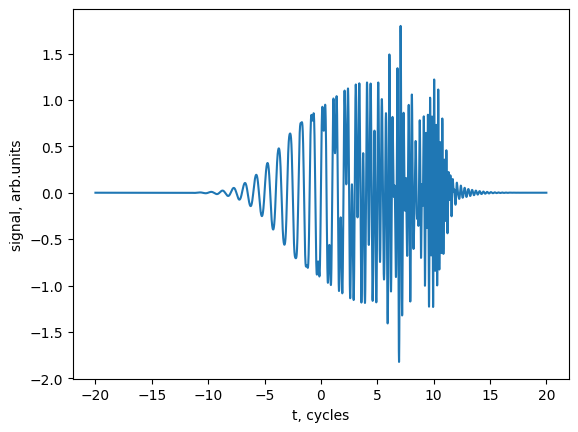

In [3]:
# generate the signal
nofts=1000

t=np.linspace(-20*2*pi, 20*2*pi, 2**14+7)

y=np.sin(t)*exp(-t**2/2/20**2)
y=y+np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)
y=y+np.sin(5.5*t)*exp(-(t-10*2*pi)**2/2/5**2)
y=y+np.sin(4*t)*exp(-(t-7*2*pi)**2/(2*5**2))

plt.plot(t/2/pi,y)

xlabel('t, cycles')
ylabel('signal, arb.units')

Text(0, 0.5, 'Power spectrum, arb. units')

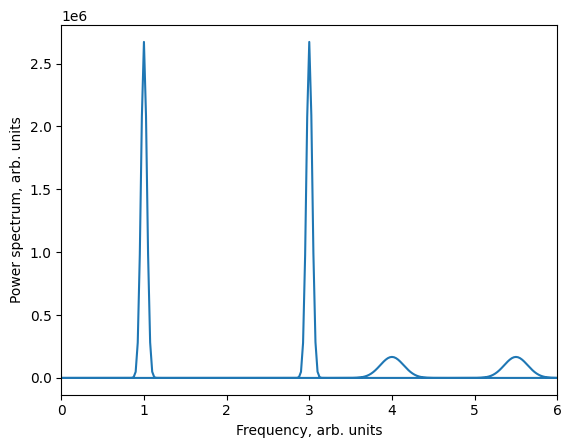

In [4]:
# Fourier spectrum
sp=fft.fft(y)
w=fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
plot(w, abs(sp)**2)
xlim(0,6)
xlabel('Frequency, arb. units')
ylabel('Power spectrum, arb. units')

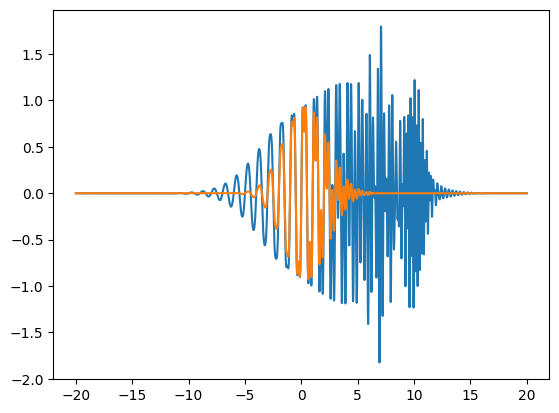

In [5]:
# windowed Fourier transform (Gabor transform, spectrogram)

window_width=2.0*2*pi
window_position=0.0*2*pi
window_function=exp(-(t-window_position)**2/2/window_width**2)

y_window=y * window_function

plot(t/2/pi, y)
plot(t/2/pi, y_window)

## **Implement the spectrogram**

In [6]:
def get_spectrogram(time=t, signal=y, nwindowsteps=1000):

    data = np.zeros((time.shape[0], nwindowsteps))
    width = 1
    positions_list = np.linspace(-20, 20, nwindowsteps)

    for pos_id, position in enumerate(positions_list):
        window_width = width*2* pi
        window_position = position*2*pi
        window_function = exp(-(time - window_position)**2 / (2 * window_width**2))
        y_window = signal * window_function
        data[:, pos_id] = abs(np.fft.fft(y_window))

    return data

In [7]:
def plot_spectrogram(spectrogram_data):

    fig, ax = subplots(figsize=(8, 6))

    dims = extent=[min(t)/(2*pi), max(t)/(2*pi), w[0], 2*w[int(len(t)/2) - 1]]
    im = ax.imshow(spectrogram_data, aspect='auto', origin='lower', extent=dims)

    fig.colorbar(im, orientation='vertical')
    ax.set_ylim(0, 10)
    ax.set_xlabel('Window position', fontsize = 12)
    ax.set_ylabel('Frequency', fontsize = 12)
    show()

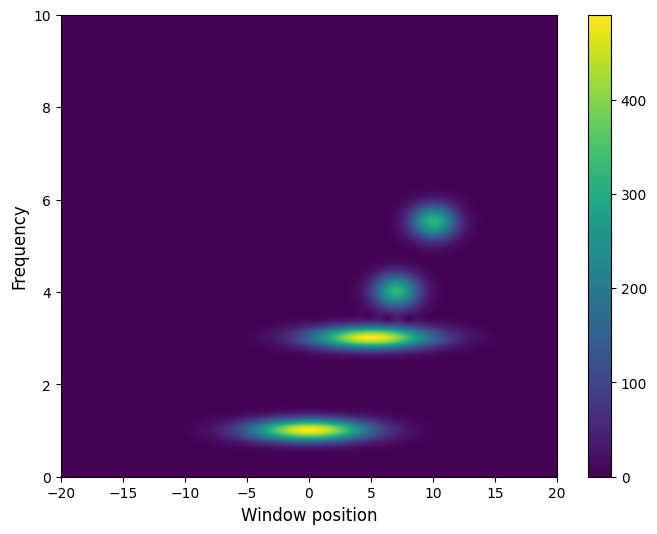

In [8]:
plot_spectrogram(get_spectrogram())

##**Measure the timing on timesteps**

In [9]:
import timeit

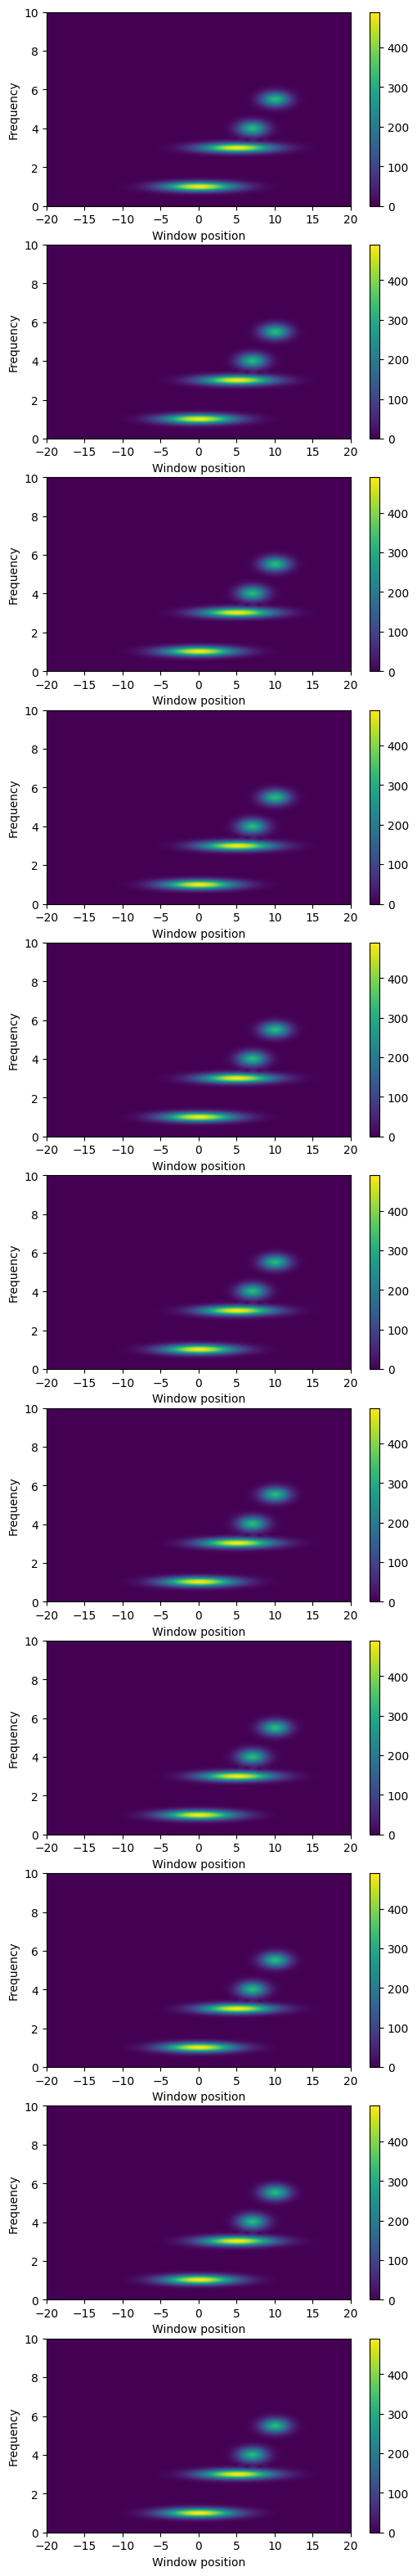

In [10]:
fig, ax = subplots(nrows=11, ncols=1, figsize=(6, 40))
shifts_list = np.arange(-5, 6, 1)
times = []

for index, shift in enumerate(shifts_list):

    t=np.linspace(-20*2*pi, 20*2*pi, 2**14+shift)

    y=np.sin(t)*exp(-t**2/2/20**2)
    y=y+np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)
    y=y+np.sin(5.5*t)*exp(-(t-10*2*pi)**2/2/5**2)
    y=y+np.sin(4*t)*exp(-(t-7*2*pi)**2/(2*5**2))

    accumulator = 0.
    n_runs = 10

    for _ in range(n_runs):
        start = timeit.default_timer()
        get_spectrogram(signal=y, time=t)
        accumulator += timeit.default_timer() - start

    times.append(round(accumulator/n_runs, 3))

    dims = extent=[min(t)/(2*pi), max(t)/(2 * pi), w[0], 2 * w[int(len(t)/2)-1]]
    data = get_spectrogram(signal=y, time=t)

    im = ax[index].imshow(data, aspect='auto', origin='lower', extent=dims)
    colorbar(im, orientation='vertical', ax=ax[index])

    ax[index].set_ylim(0, 10)
    ax[index].set_xlabel('Window position')
    ax[index].set_ylabel('Frequency')

show()

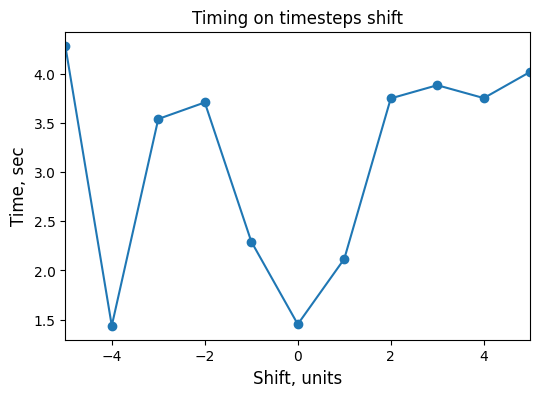

In [11]:
_, ax = subplots(figsize=(6, 4))

ax.plot(shifts_list, times, '-o')
ax.set_title('Timing on timesteps shift', fontsize=12)
xlabel('Shift, units', fontsize=12)
ylabel('Time, sec', fontsize=12)
xlim(-5, 5)
show()

All spectrograms look the same, but their computational times differ. Probably, the difference in computational time depends on np.fft.fft function realization.